## Plotting the figure 2.

The required csv files to plot the figure 2 are saved at  https://github.com/Geemjy/Geem_etal_MNRAS_2022/tree/main/data.

### Import packages and define the function

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.legend import Legend
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def subtitle_handler_factory(inherit_from):
    """Class factory to subclass Handlers and add our custom functionality
    """
    class SubtitleHandler(inherit_from):
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            handlebox.set_visible(False)
            return inherit_from.legend_artist(self, legend,
                                              orig_handle, fontsize,
                                              handlebox)

    #HandlerPatch class needs a special unpdate_func
    if inherit_from is matplotlib.legend_handler.HandlerPatch:
        return SubtitleHandler(update_func=update_from_first_child)
    return SubtitleHandler()

def subtitle_handler_map(subtitles):
    defaults_handler_map = Legend.get_default_handler_map()
    handler_map = {}
    
    for orig_handle in subtitles:
        handler = Legend.get_legend_handler(defaults_handler_map, orig_handle)
        
        #Subclass the Handler
        new_handler = subtitle_handler_factory(type(handler))
        handler_map[orig_handle] = new_handler
    return handler_map

### Plot

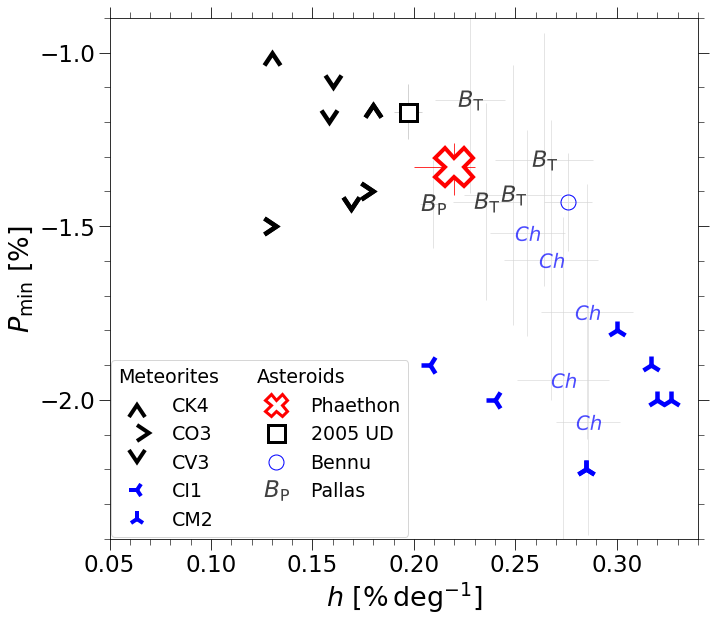

In [33]:
#==========================================
#Bring Meteo data
#==========================================
df_meteo = pd.read_csv('Geake_Dollfus_1986.csv')
df_zellner = pd.read_csv('Zellner_1977.csv')
df_zellner = pd.concat((df_zellner[df_zellner['Filter']=='O (0.585)'],
                        df_zellner[df_zellner['Filter']=='G']))
df_zellner_ = pd.DataFrame({'Name':df_zellner['sample'],
                           'Class':df_zellner['type'],
                           'Pmin':df_zellner['Pmin'],
                           'a0':df_zellner['a0'],
                           'h':df_zellner['h']})
df_meteo = pd.concat((df_meteo,df_zellner_))
Class = ['CI1', 'CK4', 'CM2', 'CO3', 'CV3', 'EH4','Euc.', 'H/L3.6', 'H4', 'H5', 'How', 'L5', 'L6',
         'LL5', 'LL6']

#==========================================
#Bring Asteroid data
#==========================================
gil = pd.read_csv('Gil_Hutton_2017.csv')
    
    
#==========================================
#Bring B-type list
#==========================================    
bf_list = pd.read_csv('B_F_ast.csv')    
Pallas_like = [2,213,426, 1508, 2100, 3200, 6411]
Themis_like = [24,62,222,316,335,379,383,419,431,704,762]    
    
    
fig,ax = plt.subplots(1,1,figsize=(10.3,9))
h4 = ax.scatter([], [], alpha=0, label="Meteorites")    

for n,meteo_class in enumerate (Class):
    df_meteo_ = df_meteo[df_meteo['Class']==meteo_class]
    marker=['*','D','X','P','<','>','v','^',
           '8','d','s','1','2','3','4','8','p','H','h']
    color=['mediumorchid','royalblue','brown','coral','crimson','gold','c','firebrick',
          'g','lime','orange','plum','teal']
    if meteo_class in ['CM2','CI1']:
        ms = 14
        mfc = 'b'
        mec = 'b'
        if meteo_class == 'CM2':
            marke='X'
            zorder=8
        else:
            marke='s'
            zorder=8
    else:
        ms = 10
        marke = marker[n]
        zorder=4
        mfc = 'k'
        mec = 'k'
        
    if meteo_class in ['EH4', 'H4', 'LL6', 'H5', 'L6', 'LL5', 'H/L3.6', 'LL5',
       'L6',  'EH4','H5', 'L6', 'How', 'Dio', 'H5', 'How', 'LL5', 'L5', 'H/L3.6', 'LL5', 'L6', 'How.', 'Euc.']:
        continue
    if len(meteo_class)==3:
        ms = 30    
    else:
        ms=20
    if meteo_class=='CI1':
        marker='3'
        ms=19
    elif meteo_class=='CM2':
        marker='2' 
        ms=19
    elif meteo_class=='CV3':
        marker=7
        ms=16
        mec='k'
    elif meteo_class=='CK4':
        marker=6 
        ms=16
        mec='k'
    elif meteo_class=='CO3':
        marker=9
        ms=16
        mec='k'
    ax.plot(df_meteo_['h'], df_meteo_['Pmin'],
              ms=ms, marker=marker,mfc='none',mec=mec,markeredgewidth=4.5,
              ls='',zorder=zorder)  
    
for meteo_class in ['CK4','CO3','CV3','CI1','CM2']    :
    if meteo_class=='CI1':
        marker='3'
        ms=19
        mec='b'
    elif meteo_class=='CM2':
        marker='2' 
        ms=19
        mec='b'
    elif meteo_class=='CV3':
        marker=7
        ms=16
        mec='k'
    elif meteo_class=='CK4':
        marker=6 
        ms=16
        mec='k'
    elif meteo_class=='CO3':
        marker=9
        ms=16
        mec='k'
    ax.errorbar(0,-99, ms=16, marker=marker,mfc='none',mec=mec,markeredgewidth=4,
              ls='',zorder=zorder,label=meteo_class)       
    

h3 = ax.errorbar([], [], alpha=0, label="Asteroids")   

#==========================
#Plot asteroids
#==========================

#Phaethon
Phaethon_pmin = np.array([-1.33])
err_Phaethon_pmin = [np.array([0.08]), np.array([0.07])] #Lower limit, Upper limit
Phaethon_slope = np.array([0.22])
err_Phaethon_slope = [np.array([0.02]), np.array([0.01])]
ax.errorbar(Phaethon_slope, Phaethon_pmin, yerr=err_Phaethon_pmin,xerr=err_Phaethon_slope,
           ls='',marker='X',mfc='w',mec='r',ms=38, ecolor='r',elinewidth=0.8,markeredgewidth=4,
           zorder=20)
ax.errorbar(0,-99,ls='',marker='X',mfc='w',mec='r',ms=22, ecolor='r',elinewidth=0.8,markeredgewidth=3,
           zorder=20,label='Phaethon')


#2005 UD
ax.errorbar(0.197, -1.17, yerr=0.08, xerr=0.007,elinewidth=1,ls='',markeredgewidth=3,
           marker='s',mfc='w',mec='k',ecolor='lightgray',ms=17)
ax.errorbar(0,-99,elinewidth=1,ls='',markeredgewidth=3,
           marker='s',mfc='w',mec='k',ecolor='lightgray',ms=17,label='2005 UD')

#Bennu
ax.errorbar( 0.276,-1.43, yerr=0.14, xerr=0.012,elinewidth=0.8,
           marker='o',mfc = 'none',mec='b',ecolor='gainsboro',ms=15,ls='')
ax.errorbar(0,-99,elinewidth=0.8,
           marker='o',mfc = 'none',mec='b',ecolor='gainsboro',ms=15,ls='',
           label='Bennu')

#B-type asteroids
BorFtype = bf_list['pdes'].values
for id_i in BorFtype:
    Pmin = gil[gil['ID']==id_i]['Pmin']
    if len(Pmin)==0:
        continue
    elif id_i in [2,24,47,85,335,431,704,1021]:
        Pmin = gil[gil['ID']==id_i]['Pmin'].values[0]
        ePmin = gil[gil['ID']==id_i]['errPmin'].values[0]
        a0 =  gil[gil['ID']==id_i]['a0'].values[0]
        ea0 =  gil[gil['ID']==id_i]['err_a0'].values[0]
        slopeh = gil[gil['ID']==id_i]['h'].values[0]
        eslopeh = gil[gil['ID']==id_i]['err_h'].values[0]
        
        if id_i in Pallas_like:
            marker= r'${0}$'.format('B_\mathrm{P}')
            mfc = 'k'
            mec = 'k'
            ecolor='lightgray'
            ms = 23
        elif id_i in Themis_like:
            marker= r'${0}$'.format('B_\mathrm{T}')
            mfc = 'k'
            mec = 'k'
            ecolor = 'lightgray'
            ms = 23
        else:
            continue
        ax.errorbar(slopeh, Pmin, yerr=ePmin, xerr=eslopeh,
           marker=marker,mfc = mfc,mec='none',ecolor=ecolor,ms=25,ls='',elinewidth=0.8,alpha=0.75)
ax.errorbar(0,-99,elinewidth=1,ls='',
           marker=r'${0}$'.format('B_\mathrm{P}'),mfc='k',mec='none',alpha=0.75,ecolor='lightgray',ms=25,label='Pallas')        
        
    
#Ch-type asteroids    
ch = gil[gil['Bus']=='Ch']
for n,i in enumerate(ch['ID'].values):
    if i in [78,105,147,404]: #Not satisfy the condition below.
        continue
    elif i in [13,19,51,84,377]: #more than 3 points between 5~15 deg & at least one data before and after inversion angle
        ax.errorbar( ch['h'].values[n], ch['Pmin'].values[n],yerr= ch['errPmin'].values[n], xerr = ch['err_h'].values[n],
                    elinewidth=0.8,
                    marker=r'${0}$'.format('Ch'),mfc = 'b',mec='none',ecolor='lightgray',ms=25,ls='',alpha=0.7)        

        
#======================        
#Cosmetic parameters
#====================== 
ax.yaxis.set_major_locator(MultipleLocator(0.5))    
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.05)) 
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.set_ylabel(r'$P_\mathrm{min}$ [%]',fontsize=27)
ax.set_xlabel(r'$h$ [$\%\,\mathrm{deg}^{-1}$]',fontsize=27)
ax.tick_params(axis = 'both', which='minor', length=6)
ax.tick_params(axis ='both',which='both', direction='out')
ax.tick_params(axis ='both',which='major', length=11)
ax.tick_params(axis = 'both')
ax.tick_params(axis='both',labelsize=23)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')    
# ax.set_yticks([0,0.1,0.2,0.3])
ax.set_ylim(-2.40,-0.9)
ax.set_xlim(0.05,0.34)

subtitles = [h4, h3]
handler_map = subtitle_handler_map(subtitles)
leg = ax.legend(fontsize=19,loc=3,ncol=2, handler_map=handler_map, bbox_to_anchor=(-0.014,-0.015))
leg._legend_box.align='left'

plt.tight_layout(pad=2.0)    
# plt.savefig('/home/judy/Dropbox/Research/Phaethon/fig2.pdf',format='pdf')
plt.show()